In [15]:
import pandas as pd
import csv 

data = pd.read_csv(r'C:\Users\User\Desktop\projet mlflow\banking.csv', sep=',')

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/294.9 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00


# Analyse univariée

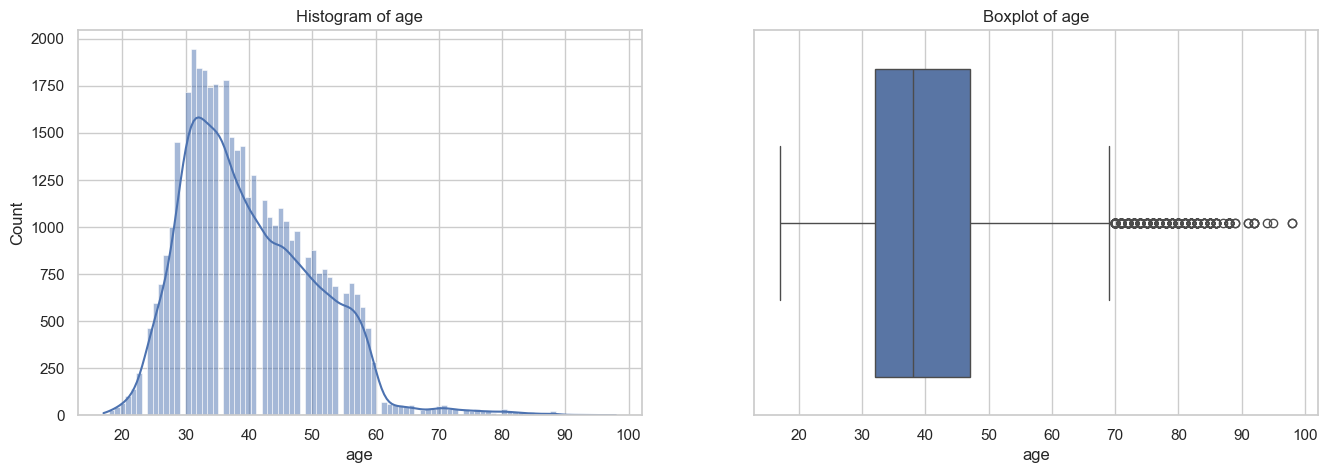

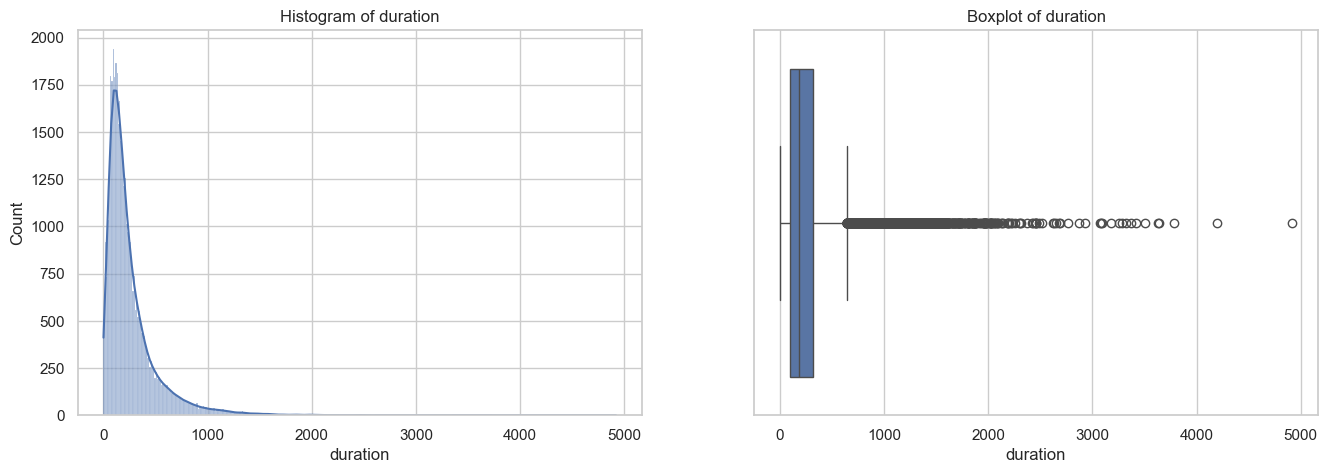

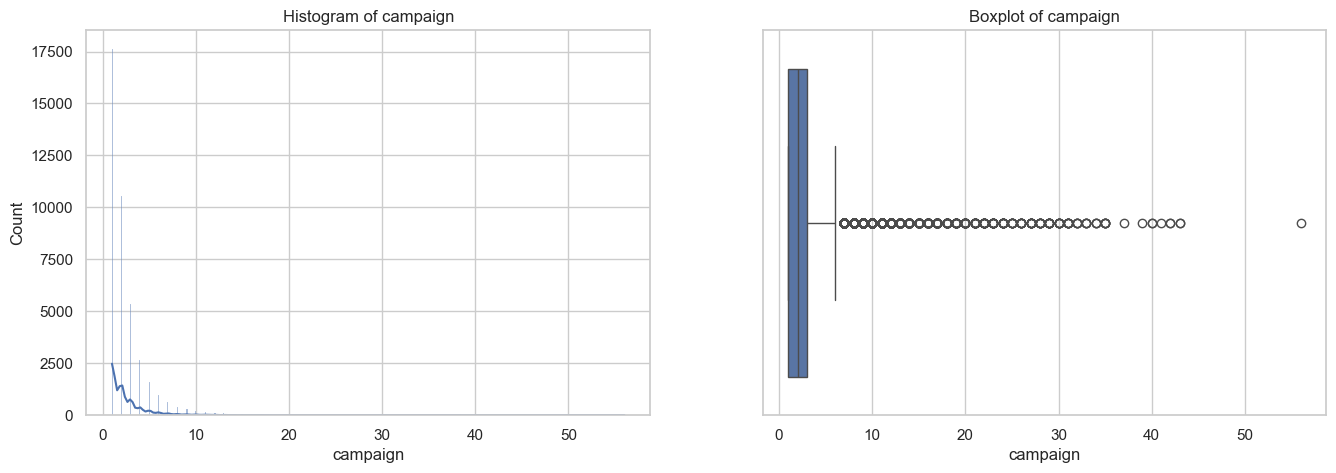

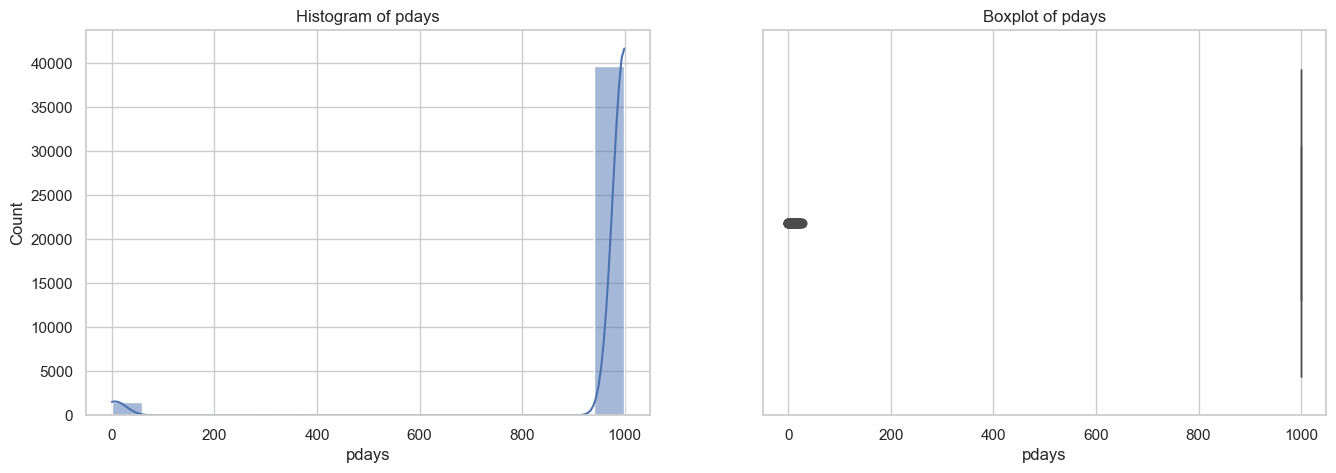

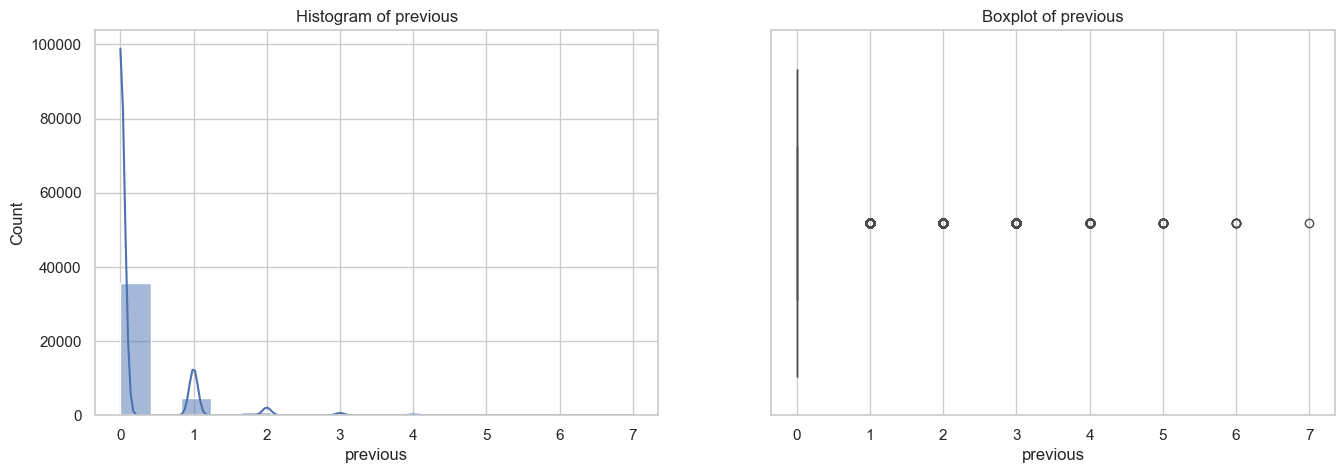

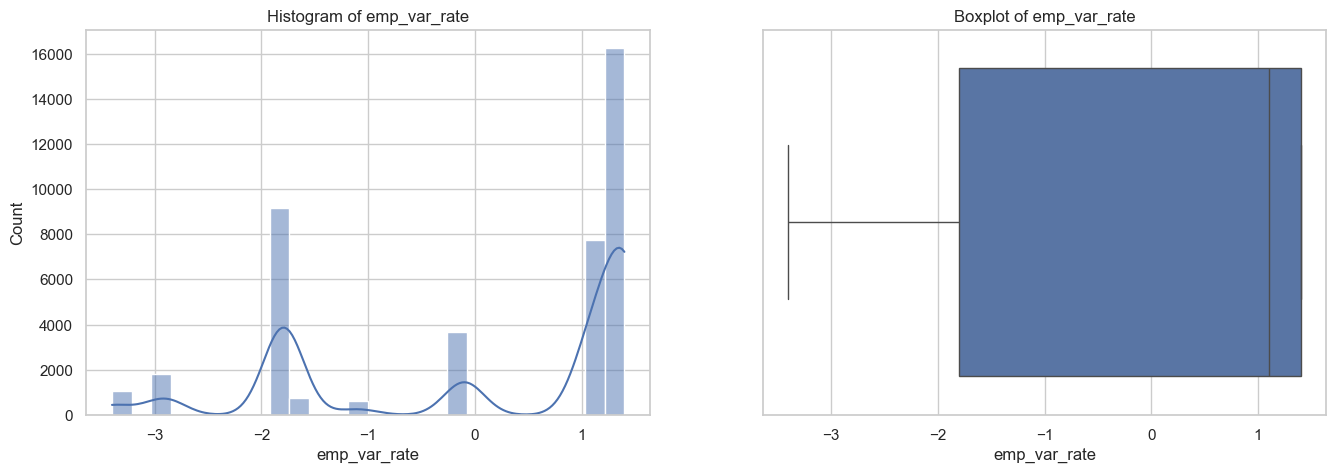

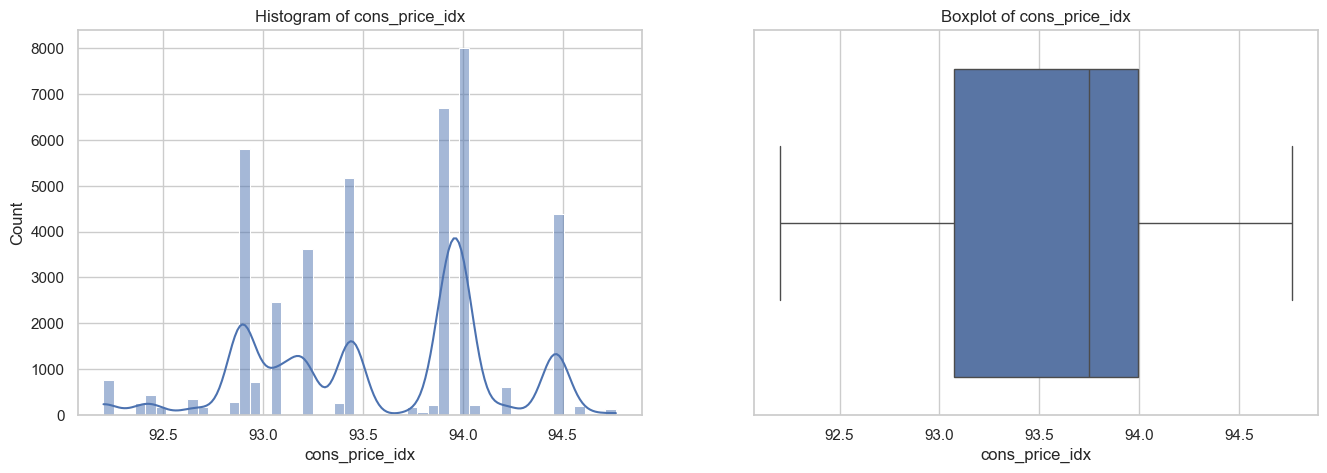

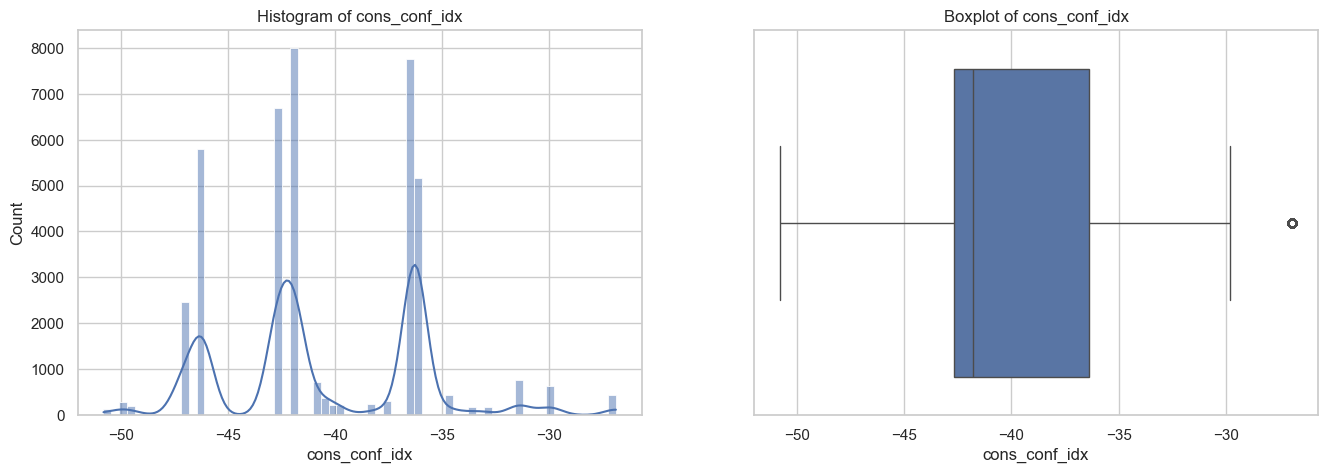

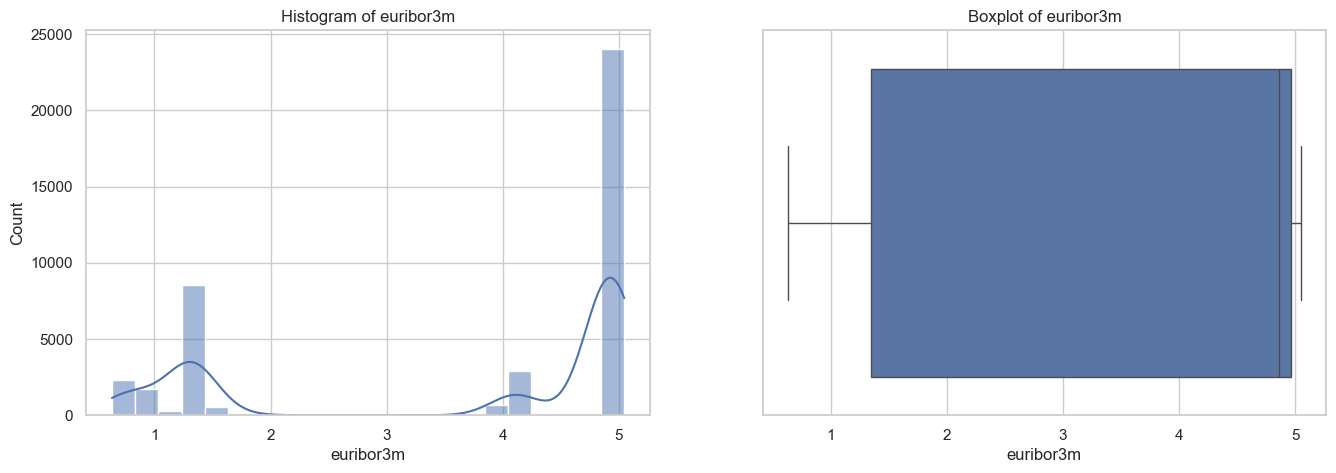

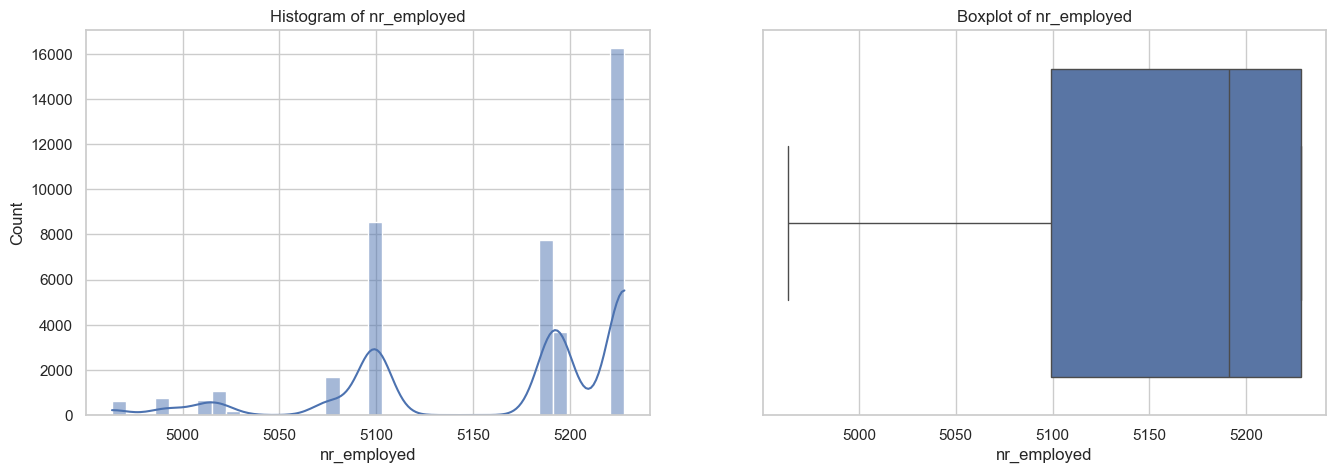

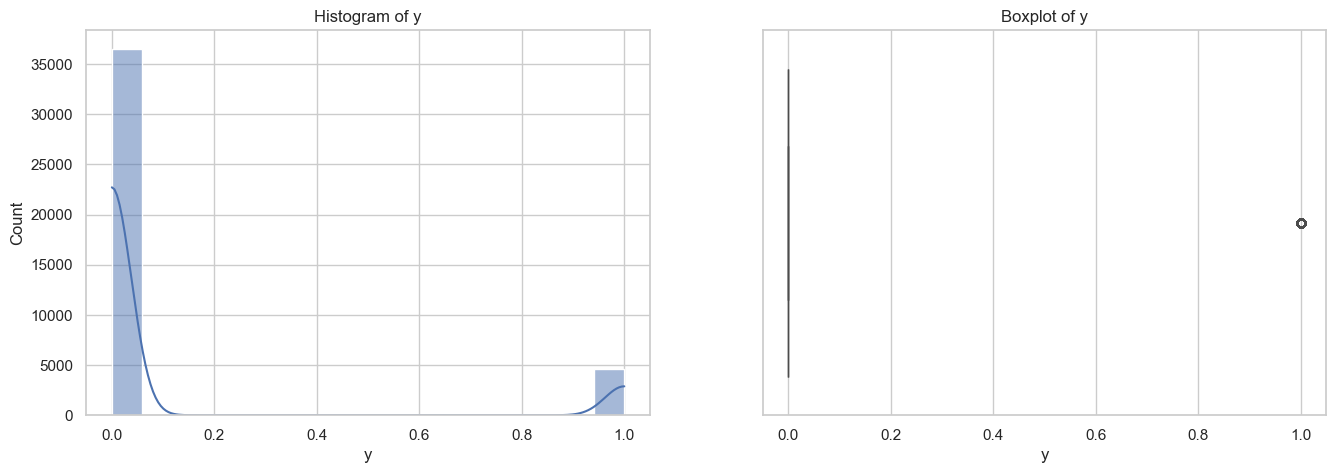

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def plot_variable_distribution(df, column_name):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    sns.histplot(data=df, x=column_name, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {column_name}')
    sns.boxplot(x=df[column_name], ax=ax[1])
    ax[1].set_title(f'Boxplot of {column_name}')
    plt.show()


numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plot_variable_distribution(data, column)


In [12]:
# Calcul du pourcentage de valeurs manquantes
missing_percentage = data.isnull().mean() * 100
print("Pourcentage de valeurs manquantes par variable :")
print(missing_percentage)

Pourcentage de valeurs manquantes par variable :
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
y                 0.0
dtype: float64


# Analyse multivariée

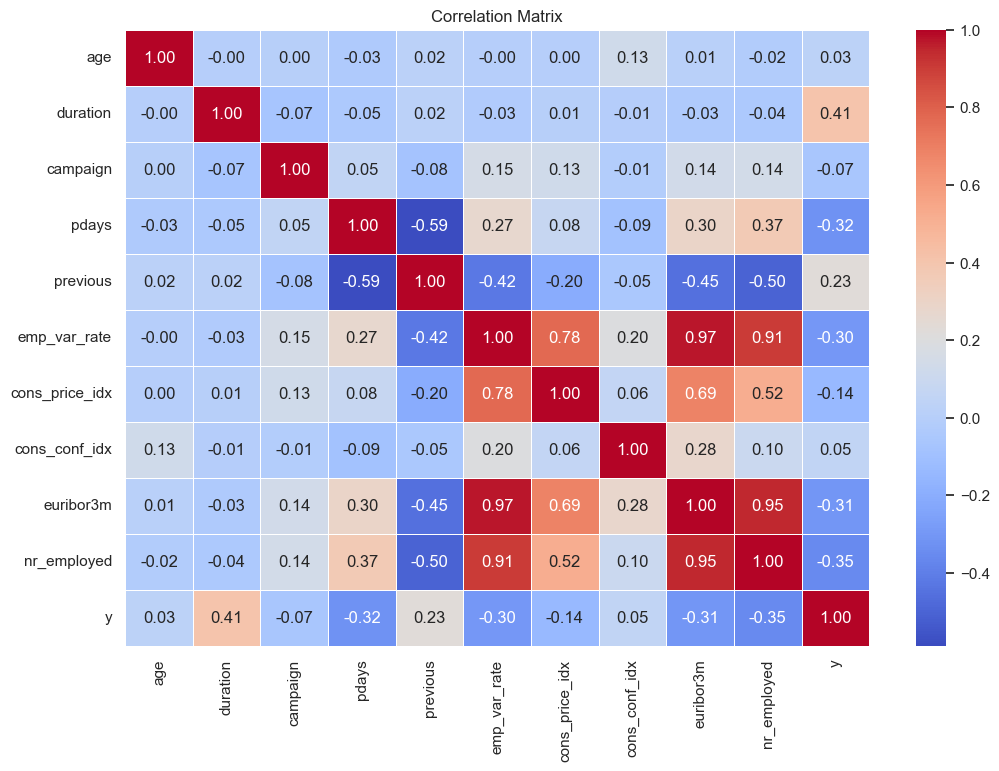

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()

# Creating a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



euribor3m et nr_employed : Ces deux variables montrent une corrélation très élevée de 0.95, suggérant que les taux d'intérêt (euribor3m) et le nombre de personnes employées sont fortement liés. Cela pourrait refléter des conditions économiques similaires qui affectent à la fois les taux d'intérêt et l'emploi.

euribor3m et emp_var_rate : Une autre corrélation élevée de 0.97 est observée ici, ce qui est logique car le taux variable de l'emploi (emp_var_rate) est souvent ajusté en fonction des changements dans les taux d'intérêt pour contrôler l'inflation et stimuler l'emploi.

cons_price_idx et cons_conf_idx : Une corrélation négative (-0.05) indique que lorsque l'indice des prix à la consommation augmente, la confiance des consommateurs tend généralement à diminuer légèrement, bien que cette corrélation soit très faible.

previous et pdays : La corrélation de -0.59 indique que plus le nombre de contacts précédents est élevé, moins de jours ont passé depuis le dernier contact, ce qui est attendu puisque des contacts fréquents sont probables dans des campagnes rapprochées.

Cette analyse multivariée offre une vue d'ensemble des relations entre les caractéristiques économiques et personnelles des individus dans le jeu de données. Utiliser ces informations peut être crucial pour la modélisation prédictive, notamment pour anticiper le comportement des clients ou pour des analyses de risque.

C:\Users\User\AppData\Local\Temp\ipykernel_19328\4126949437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='dark')


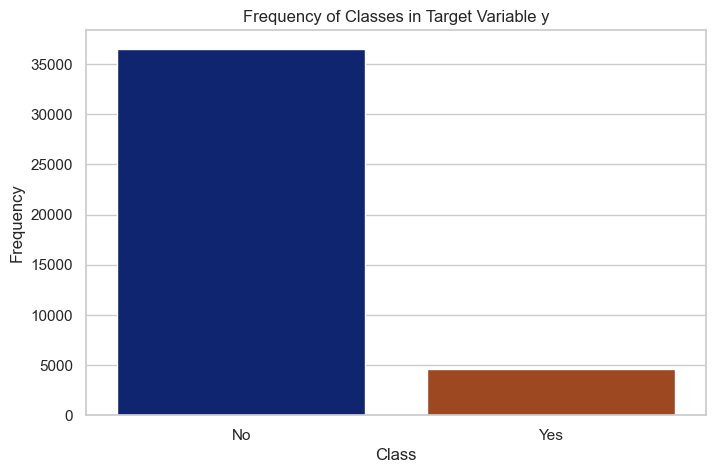

In [25]:
class_counts = data['y'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='dark')
plt.title('Frequency of Classes in Target Variable y')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])  # assuming 0 is 'No', 1 is 'Yes'
plt.show()


0 ('No') : Indique que le client n'a pas souscrit au produit (36,548 instances).
1 ('Yes') : Indique que le client a souscrit au produit (4,640 instances).
La classe 'No' est beaucoup plus fréquente que la classe 'Yes'.
Ce type de distribution déséquilibrée est commun dans les problèmes de classification binaire, en particulier dans les scénarios tels que la souscription à un produit ou la détection de fraudes, où le nombre de cas positifs (souscriptions, fraudes) est généralement beaucoup plus faible que le nombre de cas négatifs.

# Nettoyage de données 

In [28]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [34]:
# Encodage des variables catégoriques
data = pd.get_dummies(data, drop_first=True)

# Vérification et correction des erreurs de typage
data = data.convert_dtypes()

In [35]:
# Affichage des premières lignes et des informations du DataFrame nettoyé
print(data.head())

        age  duration  campaign  pdays  previous  emp_var_rate  \
0   0.40087 -0.140948 -0.822497      0         0      0.839061   
1  1.289387 -0.546922 -0.822497      0         0     -0.115781   
2 -1.178714  0.586422  0.467417      0         0     -1.134279   
3  -0.09275 -0.281911  -0.17754      0         0     -1.197935   
4  1.486835 -0.552561 -0.822497      0         0     -1.898153   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  ...  month_may  \
0       -0.227465       0.951712   0.773575      0.84517  ...      False   
1       -0.649003      -0.323536   0.230456     0.398115  ...      False   
2        0.828107        0.15198  -1.667578    -2.428157  ...      False   
3       -0.864955       -1.42587  -1.277824    -0.940281  ...      False   
4       -2.374889       1.967588  -1.586859    -1.257233  ...      False   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False      False            False             True   
1 

In [36]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  Float64
 1   duration                       41188 non-null  Float64
 2   campaign                       41188 non-null  Float64
 3   pdays                          41188 non-null  Int64  
 4   previous                       41188 non-null  Int64  
 5   emp_var_rate                   41188 non-null  Float64
 6   cons_price_idx                 41188 non-null  Float64
 7   cons_conf_idx                  41188 non-null  Float64
 8   euribor3m                      41188 non-null  Float64
 9   nr_employed                    41188 non-null  Float64
 10  y                              41188 non-null  Int64  
 11  job_blue-collar                41188 non-null  boolean
 12  job_entrepreneur               41188 non-null 